## Implementing the Bisection Method

**Author:** Guilherme Cadori


In [53]:
# Creating the Bisection Method function
def bisection(f: callable, a: float, b: float, epsilon: float, maxIter: int = 50) -> tuple:
    """
    Bisection method for finding the root of a function within a given interval.
    
    Parameters:
        f (callable): The function for which the root is to be found.
        a (float): The start of the interval.
        b (float): The end of the interval.
        epsilon (float): The desired accuracy of the result.
        maxIter (int): Maximum number of iterations. Default is 50.
        
    Returns:
        tuple: A tuple (error, root) where error is True if the method did not converge,
        and root is the approximate root found by the method.
    """
    f_a = f(a)
    f_b = f(b)

    if f_a * f_b > 0:
        raise ValueError("Error: There is no root within the indicated interval")

    # Output table header
    print('k\t  a\t\t  f(a)\t\t  b\t\t  f(b)\t\t  x\t\t  f(x)\t\tintervX')

    intervX = abs(b - a)
    x = (a + b) / 2
    f_x = f(x)

    print('-\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f' % (a, f_a, b, f_b, x, f_x, intervX))

    if intervX <= epsilon:
        return False, x

    k = 1

    while k <= maxIter:
        if f_a * f_x > 0:
            a = x
            f_a = f_x
        else:
            b = x
            f_b = f_x

        intervX = abs(b - a)
        x = (a + b) / 2
        f_x = f(x)

        print('%d\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f' % (k, a, f_a, b, f_b, x, f_x, intervX))

        if intervX <= epsilon:
            return False, x

        k += 1

    print('Error: Algorithm did not converge. Maximum allowable iterations reached.')
    return True, x


In [54]:
# Defining a testing function
def f(x):
    
    return x**3 - 9*x + 3

# Testing function the general function f(x) 
print(f(0))


3


In [55]:
# Setting parameters
a = 0
b = 1
epsilon = 0.001
maxIter = 20

# Example usage of the bisection method
error, root = bisection(f, a, b, epsilon)

if not error:
    print(f'\nApproximate Root: {root:.6f}')
else:
    print('\nError: The bisection method did not converge.')


k	  a		  f(a)		  b		  f(b)		  x		  f(x)		intervX
-	0.000000	3.000000	1.000000	-5.000000	0.500000	-1.375000	1.000000
1	0.000000	3.000000	0.500000	-1.375000	0.250000	0.765625	0.500000
2	0.250000	0.765625	0.500000	-1.375000	0.375000	-0.322266	0.250000
3	0.250000	0.765625	0.375000	-0.322266	0.312500	0.218018	0.125000
4	0.312500	0.218018	0.375000	-0.322266	0.343750	-0.053131	0.062500
5	0.312500	0.218018	0.343750	-0.053131	0.328125	0.082203	0.031250
6	0.328125	0.082203	0.343750	-0.053131	0.335938	0.014474	0.015625
7	0.335938	0.014474	0.343750	-0.053131	0.339844	-0.019344	0.007812
8	0.335938	0.014474	0.339844	-0.019344	0.337891	-0.002439	0.003906
9	0.335938	0.014474	0.337891	-0.002439	0.336914	0.006017	0.001953
10	0.336914	0.006017	0.337891	-0.002439	0.337402	0.001789	0.000977

Approximate Root: 0.337402


In [56]:
import matplotlib.pyplot as plt

def bisection_withGraphData(f: callable, a: float, b: float, epsilon: float, maxIter: int = 50) -> tuple:
    """
    Bisection method for finding the root of a function within a given interval.
    Returns intervals and corresponding function values for each iteration.

    Parameters:
        f (callable): The function for which the root is to be found.
        a (float): The start of the interval.
        b (float): The end of the interval.
        epsilon (float): The desired accuracy of the result.
        maxIter (int): Maximum number of iterations. Default is 50.

    Returns:
        tuple: A tuple (intervals, function_values) where intervals is a list of interval sizes,
        and function_values is a list of corresponding function values at each iteration.
    """
    intervals = []  # List to store interval sizes
    function_values = []  # List to store corresponding function values

    f_a = f(a)
    f_b = f(b)

    if f_a * f_b > 0:
        raise ValueError("Error: There is no root within the indicated interval")

    intervX = abs(b - a)
    x = (a + b) / 2
    f_x = f(x)

    intervals.append(intervX)
    function_values.append(f_x)

    if intervX <= epsilon:
        return intervals, function_values

    k = 1

    while k <= maxIter:
        if f_a * f_x > 0:
            a = x
            f_a = f_x
        else:
            b = x
            f_b = f_x

        intervX = abs(b - a)
        x = (a + b) / 2
        f_x = f(x)

        intervals.append(intervX)
        function_values.append(f_x)

        if intervX <= epsilon:
            return intervals, function_values

        k += 1

    return intervals, function_values


# Example usage and plotting (requires matplotlib)
import matplotlib.pyplot as plt

intervals, function_values = bisection_withGraphData(f, a, b, epsilon,maxIter)


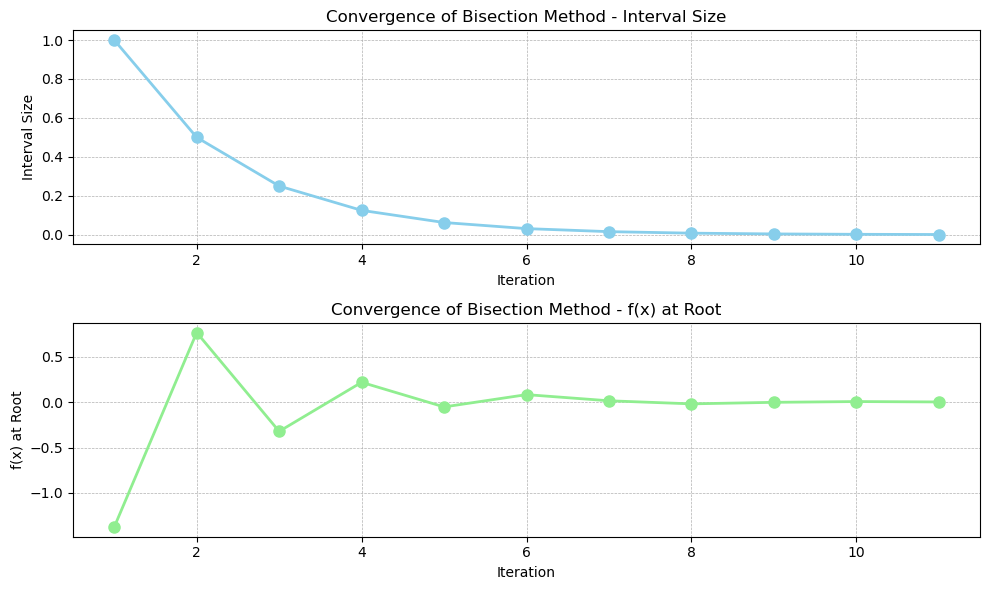

In [57]:
# Plotting intervX and f_x in separate plots with gridlines and better colors
plt.figure(figsize=(10, 6))

# Plotting intervX
plt.subplot(2, 1, 1)
plt.plot(range(1, len(intervals) + 1), intervals, marker='o', color='skyblue', linewidth=2, markersize=8)
plt.xlabel('Iteration')
plt.ylabel('Interval Size')
plt.title('Convergence of Bisection Method - Interval Size')
plt.grid(True, linestyle='--', linewidth=0.5)

# Plotting f_x
plt.subplot(2, 1, 2)
plt.plot(range(1, len(function_values) + 1), function_values, marker='o', color='lightgreen', linewidth=2, markersize=8)
plt.xlabel('Iteration')
plt.ylabel('f(x) at Root')
plt.title('Convergence of Bisection Method - f(x) at Root')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


### End